In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Add XGBoost and LightGBM
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [6]:

df = pd.read_csv('data.csv')

In [7]:
df.head(5)

,time,ptime,wind_direction,wind_speed,temperature,pressure,power
0,2019-01-01 00:00:00,2018-12-31 06:00:00,293.198308,9.004684,275.698962,103353.718750,2707.0
1,2019-01-01 00:15:00,2018-12-31 06:00:00,292.102529,8.847332,275.636830,103343.753906,2749.0
2,2019-01-01 00:30:00,2018-12-31 06:00:00,291.005947,8.689980,275.574697,103333.789062,2566.0
3,2019-01-01 00:45:00,2018-12-31 06:00:00,289.909365,8.532627,275.512564,103323.824219,2613.0
4,2019-01-01 01:00:00,2018-12-31 06:00:00,288.813586,8.375275,275.450431,103313.859375,2602.0


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103392 entries, 0 to 103391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   time            103392 non-null  object 
 1   ptime           103392 non-null  object 
 2   wind_direction  103392 non-null  float64
 3   wind_speed      103392 non-null  float64
 4   temperature     102816 non-null  float64
 5   pressure        102816 non-null  float64
 6   power           99734 non-null   float64
dtypes: float64(5), object(2)
memory usage: 5.5+ MB


In [179]:
df.head(5)

,time,ptime,wind_direction,wind_speed,temperature,pressure,power
0,2019-01-01 00:00:00,2018-12-31 06:00:00,293.198308,9.004684,275.698962,103353.718750,2707.0
1,2019-01-01 00:15:00,2018-12-31 06:00:00,292.102529,8.847332,275.636830,103343.753906,2749.0
2,2019-01-01 00:30:00,2018-12-31 06:00:00,291.005947,8.689980,275.574697,103333.789062,2566.0
3,2019-01-01 00:45:00,2018-12-31 06:00:00,289.909365,8.532627,275.512564,103323.824219,2613.0
4,2019-01-01 01:00:00,2018-12-31 06:00:00,288.813586,8.375275,275.450431,103313.859375,2602.0


In [180]:
missing_values = df.isnull().sum()
missing_values

time                 0
ptime                0
wind_direction       0
wind_speed           0
temperature        576
pressure           576
power             3658
dtype: int64

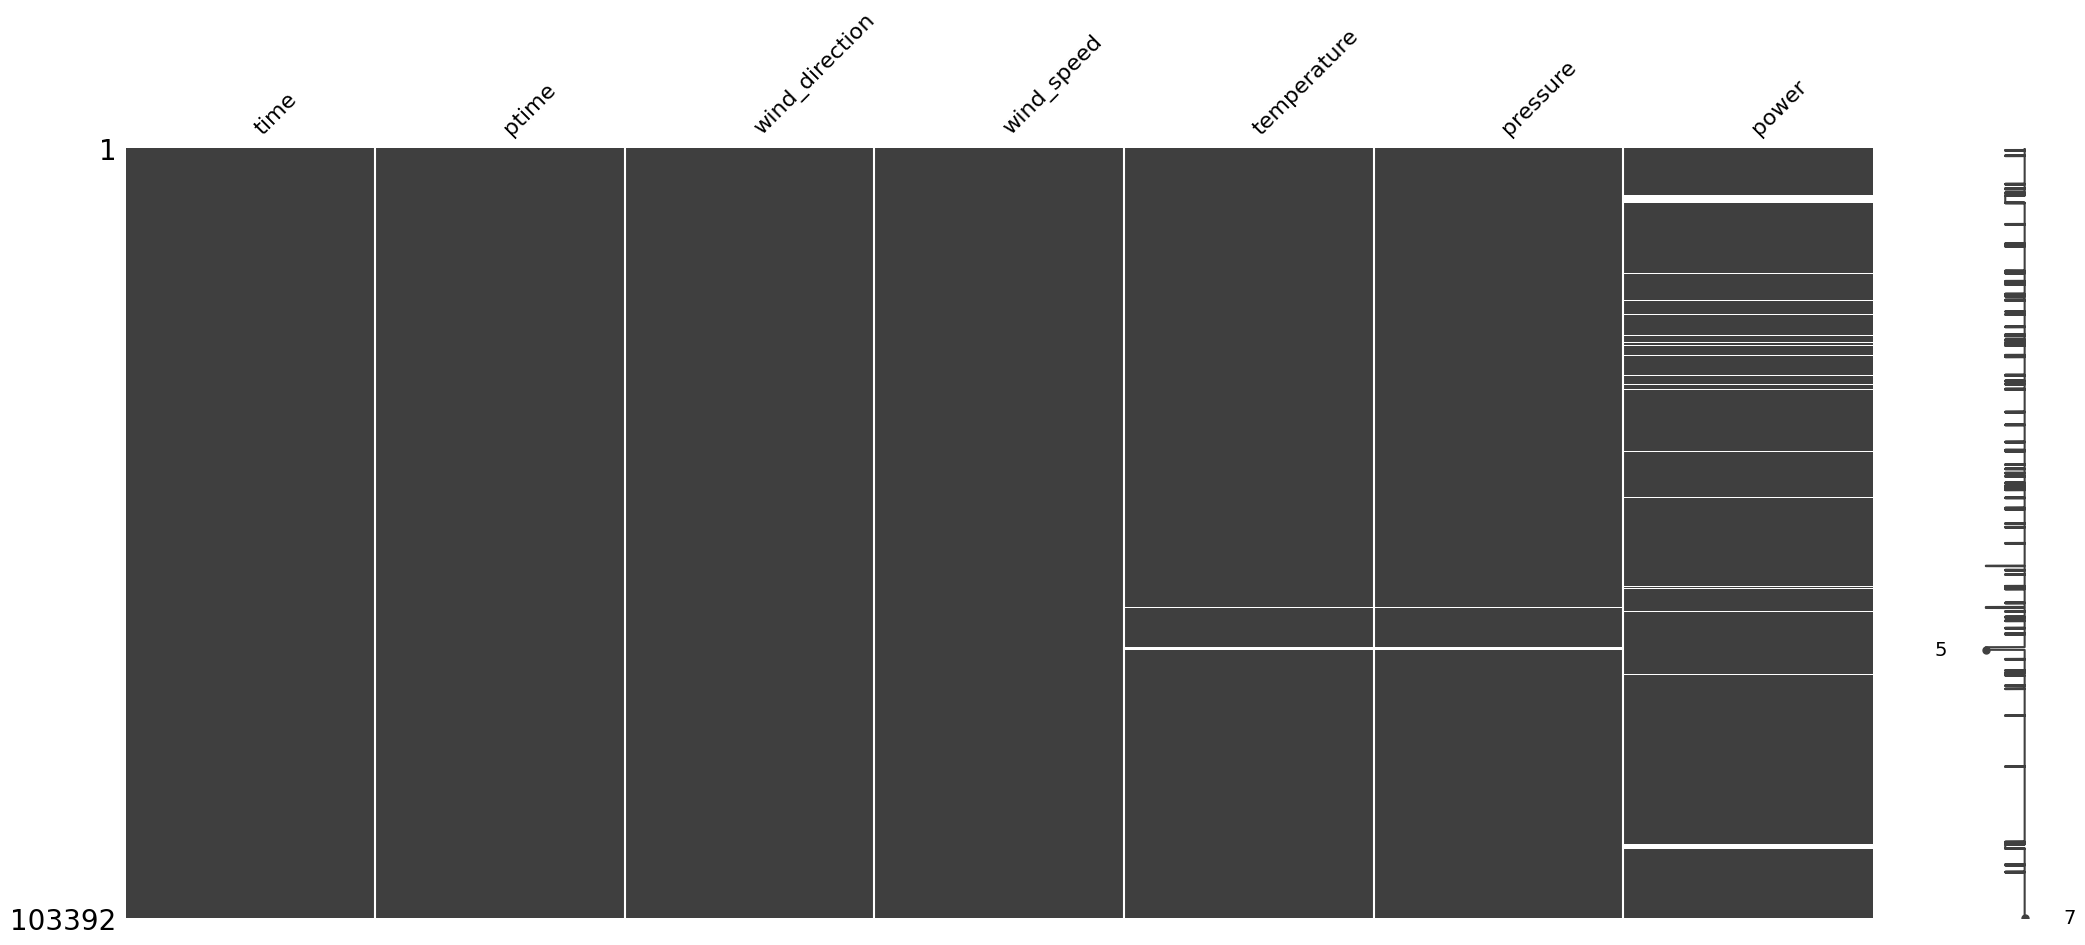

In [181]:
msno.matrix(df)
plt.show()


Da die fehlenden Daten (Druck und Temperatur) nicht zufällig sind, habe ich beobachtet, dass die Temperatur und der Druck das gleiche Muster fehlender Werte aufweisen. Daher würde ich in diesem Fall keine Mittelwert- oder Median-Imputation bevorzugen.

Stattdessen würde ich mich für die lineare Interpolationstechnik entscheiden, um die fehlenden Werte aufzufüllen, da es sich bei den Daten um Zeitreihen mit einem hochfrequenten Intervall von 15 Minuten handelt. Ein wesentlicher Vorteil der Interpolation ist, dass der Trend der Daten erhalten bleibt. Darüber hinaus kann die Vorwärts- und Rückwärtsauffüllung manchmal geeignet sein, um fehlende Werte für Zeitreihendaten zu ergänzen.

Anstatt das Modell jedoch nur auf der Grundlage dieser Imputationstechnik zu validieren, beabsichtige ich, seine Leistung zu bewerten, indem ich sowohl Vorwärts- und Rückwärtsfüllung als auch lineare Interpolation verwende. Dieser Ansatz wird dazu beitragen, die effektivste Methode für den Umgang mit fehlenden Werten im Datensatz zu ermitteln.

Da diese Daten für das Modelltraining verwendet werden sollen, wäre das Entfernen der Zeilen mit fehlenden „Power“-Werten die beste Option.
Es ist auch sehr wichtig, die Ursache für die fehlenden Werte zu finden. 
Es könnte sich um Sensorfehlfunktionen, Kommunikationsprobleme oder andere Probleme handeln.

In [182]:
df_cleaned = df.dropna(subset=['power'])
df_cleaned['temperature'].interpolate(inplace=True) 
df_cleaned['pressure'].interpolate(inplace=True)


print(df_cleaned.isnull().sum())

time              0
ptime             0
wind_direction    0
wind_speed        0
temperature       0
pressure          0
power             0
dtype: int64


/tmp/ipykernel_63979/2805214582.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['temperature'].interpolate(inplace=True)
/tmp/ipykernel_63979/2805214582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['temperature'].interpolate(inplace=True)
/tmp/ipykernel_63979/2805214582.py:3: FutureWarning: A value is trying to

In [183]:
df_cleaned['ptime'] = pd.to_datetime(df_cleaned['ptime'], errors='coerce')

/tmp/ipykernel_63979/3319297912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ptime'] = pd.to_datetime(df_cleaned['ptime'], errors='coerce')


In [184]:
df_cleaned["time"] = pd.to_datetime(df_cleaned["time"])
df_cleaned.set_index("time", inplace=True)
df_hourly = df_cleaned.resample("1D").mean()
df_hourly.reset_index(inplace=True)

print(df_hourly.head())

        time                         ptime  wind_direction  wind_speed  \
0 2019-01-01 2018-12-31 21:00:00.000000000      275.533202   11.588646   
1 2019-01-02 2019-01-01 21:55:51.724137728      313.469128   11.976036   
2 2019-01-03 2019-01-02 21:00:00.000000000      304.501917    7.583021   
3 2019-01-04 2019-01-03 20:54:11.612903168      292.984274    8.612425   
4 2019-01-05 2019-01-04 21:00:00.000000000      284.051267   13.691578   

   temperature       pressure        power  
0   274.931052  102829.531942  7507.229167  
1   271.585685  103019.157560  8522.229885  
2   269.449376  103671.525472  5151.031250  
3   270.506826  103472.493581  5588.365591  
4   272.621980  102751.132216  8727.739583  


/tmp/ipykernel_63979/2036309236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["time"] = pd.to_datetime(df_cleaned["time"])


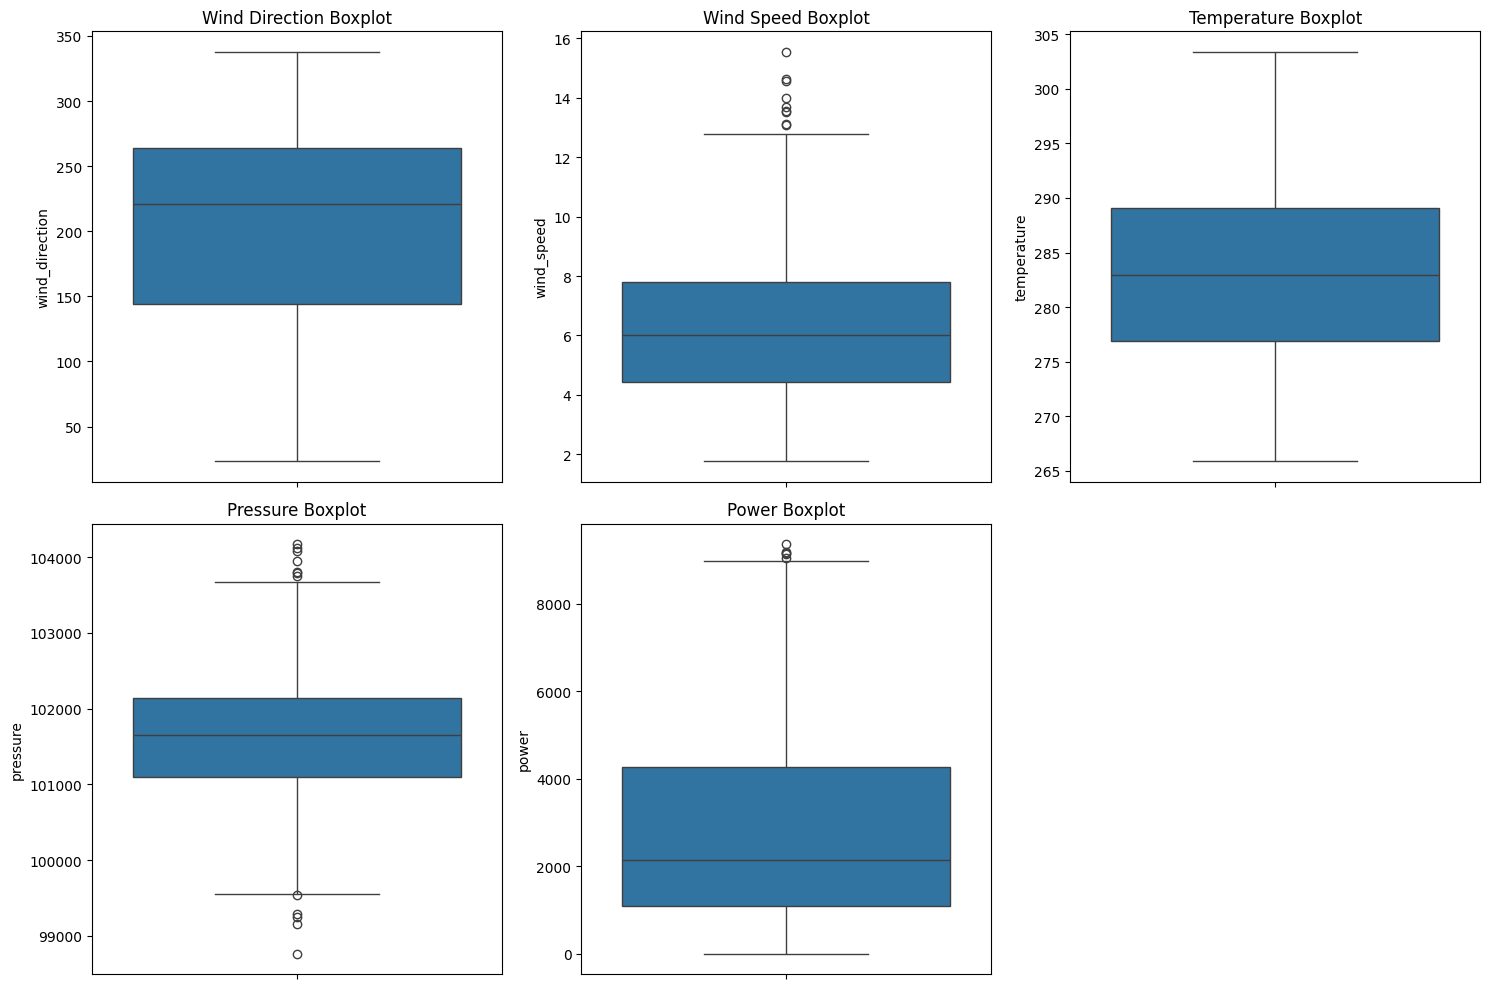

In [185]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(y=df_hourly['wind_direction'])
plt.title('Wind Direction Boxplot')

plt.subplot(2, 3, 2)
sns.boxplot(y=df_hourly['wind_speed'])
plt.title('Wind Speed Boxplot')

plt.subplot(2, 3, 3)
sns.boxplot(y=df_hourly['temperature'])
plt.title('Temperature Boxplot')

plt.subplot(2, 3, 4)
sns.boxplot(y=df_hourly['pressure'])
plt.title('Pressure Boxplot')

plt.subplot(2, 3, 5)
sns.boxplot(y=df_hourly['power'])
plt.title('Power Boxplot')

plt.tight_layout()
plt.show()

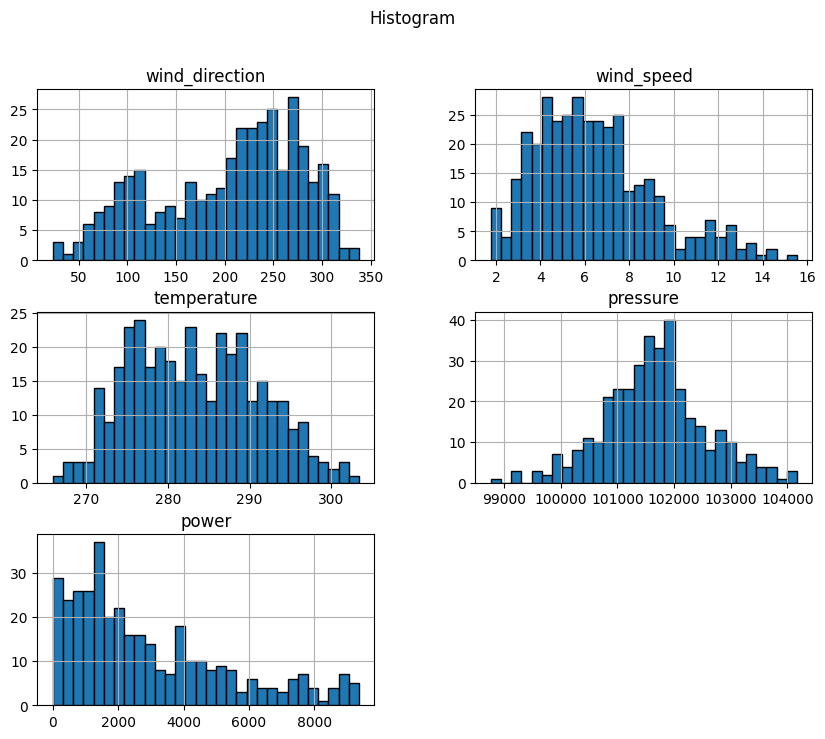

In [186]:
exclude_cols = ["time", "ptime"]
df_hourly_filtered = df_hourly.drop(columns=exclude_cols)

df_hourly_filtered.hist(figsize=(10, 8), bins=30, edgecolor='black')
plt.suptitle("Histogram")
plt.show()



Windrichtung: Scheint eine multimodale Verteilung zu haben, nicht normal.

Windgeschwindigkeit: Rechtsschief (langer Schweif rechts).

Temperatur: Annähernd symmetrisch, aber keine perfekte Normalverteilung.

Druck: Nahezu normal, aber leicht schief.

Leistung: Stark rechtsschief (nicht normal).

Da die Daten nicht normalverteilt zu sein scheinen, werde ich mich darauf konzentrieren, Ausreißer mit Hilfe des Quantilansatzes zu entfernen. Wenn ich jedoch Ausreißer mit der Z-Score-Methode feststellen würde, würde ich die Ausreißer entfernen und dann die Leistung des Modells bewerten. Für die Datenaufbereitung werde ich den Quantilsbereich-Ansatz verwenden, um Ausreißer zu entfernen.

In [187]:
df = df_hourly
df['time'] = pd.to_datetime(df['time'])

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

wind_speed_outliers = detect_outliers_iqr(df, 'wind_speed')
pressure_outliers = detect_outliers_iqr(df, 'pressure')
power_outliers = detect_outliers_iqr(df, 'power')


print("Outlier Analysis:")
print(f"Wind Speed Outliers: {len(wind_speed_outliers)} ({len(wind_speed_outliers) / len(df) * 100:.2f}%)")
print(f"Pressure Outliers: {len(pressure_outliers)} ({len(pressure_outliers) / len(df) * 100:.2f}%)")
print(f"Power Outliers: {len(power_outliers)} ({len(power_outliers) / len(df) * 100:.2f}%)")


power_outliers_index = power_outliers.index
wind_speed_outliers_index = wind_speed_outliers.index

common_index = power_outliers_index.intersection(wind_speed_outliers_index)

print(f'Number of power and wind speed outliers that share the same index: {len(common_index)}')


Outlier Analysis:
Wind Speed Outliers: 9 (2.47%)
Pressure Outliers: 12 (3.29%)
Power Outliers: 5 (1.37%)
Number of power and wind speed outliers that share the same index: 2



Es gab 9 Ausreißer bei der Windgeschwindigkeit (2,47 %), die auf Messfehler des Anemometers zurückgeführt werden konnten. Außerdem wurden 12 Druckausreißer (3,29 %) festgestellt, die möglicherweise auf eine Fehlfunktion des barometrischen Sensors zurückzuführen sind. Darüber hinaus wurden 5 Stromausreißer (1,37 %) festgestellt, die durch plötzliche Stromstöße, Messfehler des Stromzählers oder Turbinenstörungen verursacht worden sein könnten. Es ist sehr wichtig zu untersuchen, ob es sich bei den Ausreißern um gültige Extremereignisse oder um Sensorfehlfunktionen handelt. Daher ist es wichtig, die Wartungsdaten der Windturbine zu haben, die in diesem Szenario fehlen. Ich würde gerne die Wartungsdaten sehen. 

In [188]:
#Combine all outlier indices
outlier_indices = set(wind_speed_outliers.index) | set(pressure_outliers.index) | set(power_outliers.index)

# Remove outliers from the dataset
df_clean = df.drop(index=outlier_indices)

print(f"Original dataset size: {df.shape[0]}")
print(f"Cleaned dataset size: {df_clean.shape[0]}")
print(f"Number of removed outliers: {df.shape[0] - df_clean.shape[0]}")


Original dataset size: 365
Cleaned dataset size: 341
Number of removed outliers: 24


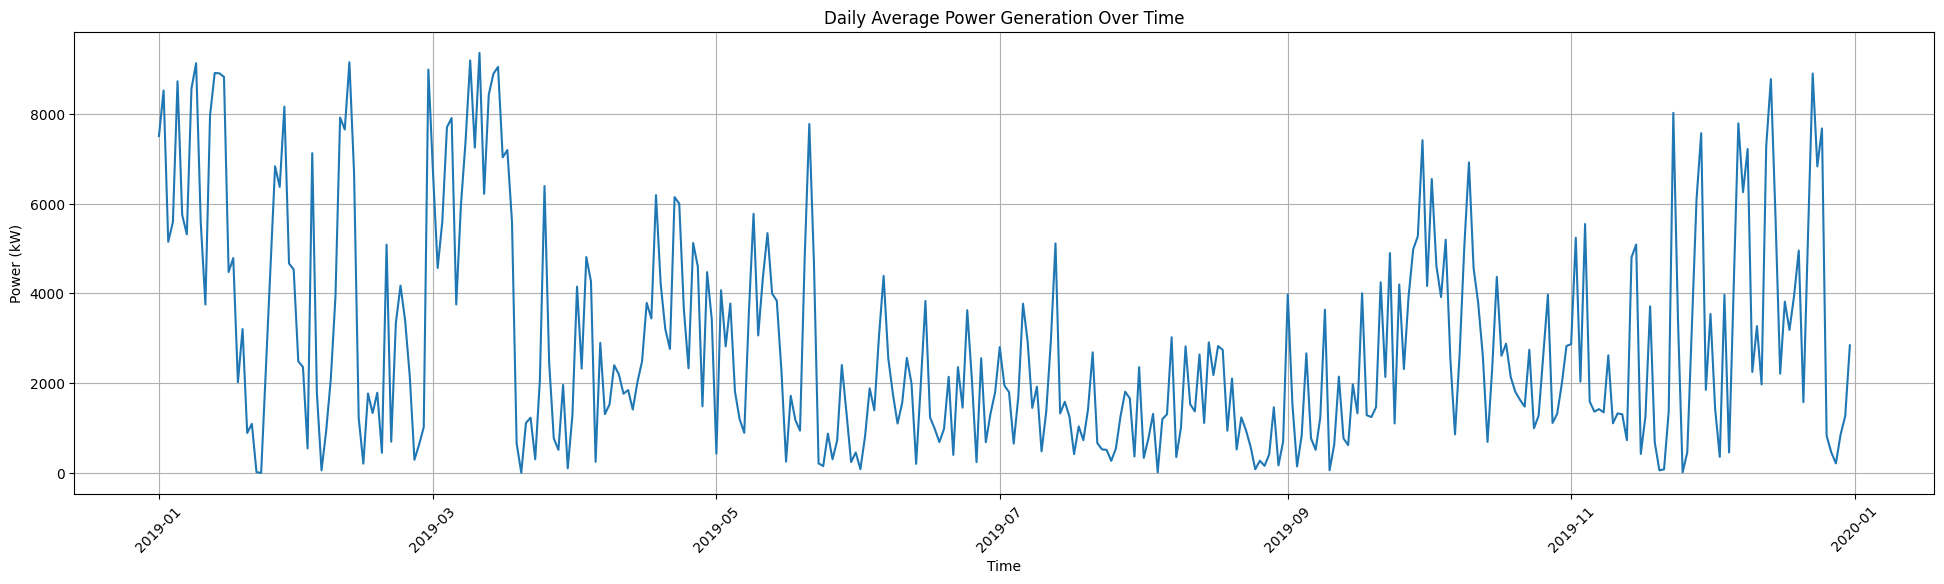

In [189]:
plt.figure(figsize=(24, 6))
sns.lineplot(x=df_hourly['time'], y=df_hourly["power"])
plt.xlabel("Time")
plt.ylabel("Power (kW)")
plt.title("Daily Average Power Generation Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Dieses Diagramm zeigt eindeutig eine saisonale Abhängigkeit. Daher müssen wir beim Entwurf des Datenmodells sicherstellen, dass es dieses saisonale Muster effektiv erfasst.

In [ ]:
sns.pairplot(df_hourly)
plt.show()

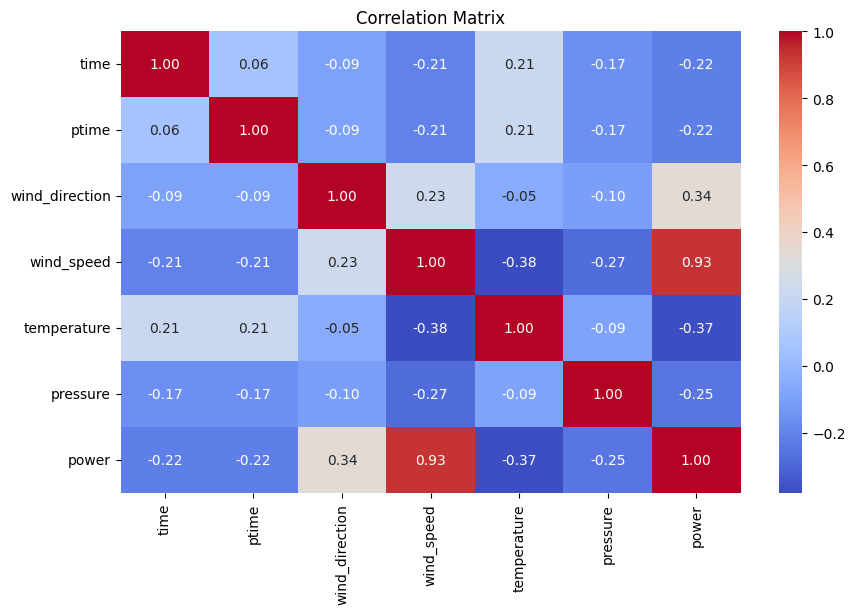

                    time     ptime  wind_direction  wind_speed  temperature  \
time            1.000000  0.057851       -0.094526   -0.206690     0.211815   
ptime           0.057851  1.000000       -0.094502   -0.206662     0.211828   
wind_direction -0.094526 -0.094502        1.000000    0.232450    -0.054456   
wind_speed     -0.206690 -0.206662        0.232450    1.000000    -0.381926   
temperature     0.211815  0.211828       -0.054456   -0.381926     1.000000   
pressure       -0.165187 -0.165191       -0.104728   -0.274823    -0.085363   
power          -0.219786 -0.219756        0.336291    0.932331    -0.372147   

                pressure     power  
time           -0.165187 -0.219786  
ptime          -0.165191 -0.219756  
wind_direction -0.104728  0.336291  
wind_speed     -0.274823  0.932331  
temperature    -0.085363 -0.372147  
pressure        1.000000 -0.248482  
power          -0.248482  1.000000  


In [159]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_hourly.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
print(df_hourly.corr())

In [160]:
df_hourly.head(10)

,time,ptime,wind_direction,wind_speed,temperature,pressure,power
0,2019-01-01,2018-12-31 21:00:00.000000000,275.533202,11.588646,274.931052,102829.531942,7507.229167
1,2019-01-02,2019-01-01 21:55:51.724137728,313.469128,11.976036,271.585685,103019.157560,8522.229885
2,2019-01-03,2019-01-02 21:00:00.000000000,304.501917,7.583021,269.449376,103671.525472,5151.031250
3,2019-01-04,2019-01-03 20:54:11.612903168,292.984274,8.612425,270.506826,103472.493581,5588.365591
4,2019-01-05,2019-01-04 21:00:00.000000000,284.051267,13.691578,272.621980,102751.132216,8727.739583
5,2019-01-06,2019-01-05 21:00:00.000000000,302.045095,9.242556,274.037431,102987.641778,5752.979167
6,2019-01-07,2019-01-06 21:00:00.000000000,283.690190,8.482581,272.563575,103177.424072,5316.145833
7,2019-01-08,2019-01-07 21:00:00.000000000,264.800194,15.548733,273.647660,101510.053372,8564.156250
8,2019-01-09,2019-01-08 21:00:00.000000000,313.722474,12.329643,271.478439,101188.600545,9130.125000
9,2019-01-10,2019-01-09 21:00:00.000000000,296.659824,8.325810,270.240841,102217.754422,5580.802083


In [161]:

# 1. Time-based features
df_hourly['day_of_week'] = df_hourly['ptime'].dt.dayofweek
df_hourly['month'] = df_hourly['ptime'].dt.month
df_hourly['hour'] = df_hourly['ptime'].dt.hour
df_hourly['week_of_year'] = df_hourly['ptime'].dt.isocalendar().week

Um die saisonalen, täglichen und wöchentlichen Muster zu erfassen, plane ich, Merkmale für den Wochentag, den Monat, die Stunde und die Woche des Jahres zu erstellen. Dies wird dem Modell helfen, saisonale Trends zu erkennen, da wir beobachtet haben, dass die Stromerzeugung im Untergrund mit den Jahreszeiten variiert.

In [163]:
df_hourly

,time,ptime,wind_direction,wind_speed,temperature,pressure,power,day_of_week,month,hour,week_of_year
0,2019-01-01,2018-12-31 21:00:00.000000000,275.533202,11.588646,274.931052,102829.531942,7507.229167,0.0,12.0,21.0,1
1,2019-01-02,2019-01-01 21:55:51.724137728,313.469128,11.976036,271.585685,103019.157560,8522.229885,1.0,1.0,21.0,1
2,2019-01-03,2019-01-02 21:00:00.000000000,304.501917,7.583021,269.449376,103671.525472,5151.031250,2.0,1.0,21.0,1
3,2019-01-04,2019-01-03 20:54:11.612903168,292.984274,8.612425,270.506826,103472.493581,5588.365591,3.0,1.0,20.0,1
4,2019-01-05,2019-01-04 21:00:00.000000000,284.051267,13.691578,272.621980,102751.132216,8727.739583,4.0,1.0,21.0,1
...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,2019-12-26 22:00:00.000000000,96.993423,3.488246,273.558344,102997.993761,457.726852,3.0,12.0,22.0,52
361,2019-12-28,2019-12-27 21:00:00.000000000,61.830774,3.524274,271.371102,104114.419529,212.687500,4.0,12.0,21.0,52
362,2019-12-29,2019-12-28 21:00:00.000000000,134.329618,4.427478,271.599174,104076.321262,852.583333,5.0,12.0,21.0,52
363,2019-12-30,2019-12-29 21:00:00.000000000,178.838658,6.355783,277.732456,103505.480482,1264.614583,6.0,12.0,21.0,52


In [164]:
df_hourly['wind_direction_sin'] = np.sin(np.radians(df_hourly['wind_direction']))
df_hourly['wind_direction_cos'] = np.cos(np.radians(df_hourly['wind_direction']))

In [165]:
df_hourly.head(5)

,time,ptime,wind_direction,wind_speed,temperature,pressure,power,day_of_week,month,hour,week_of_year,wind_direction_sin,wind_direction_cos
0,2019-01-01,2018-12-31 21:00:00.000000000,275.533202,11.588646,274.931052,102829.531942,7507.229167,0.0,12.0,21.0,1,-0.995340,0.096423
1,2019-01-02,2019-01-01 21:55:51.724137728,313.469128,11.976036,271.585685,103019.157560,8522.229885,1.0,1.0,21.0,1,-0.725745,0.687964
2,2019-01-03,2019-01-02 21:00:00.000000000,304.501917,7.583021,269.449376,103671.525472,5151.031250,2.0,1.0,21.0,1,-0.824107,0.566434
3,2019-01-04,2019-01-03 20:54:11.612903168,292.984274,8.612425,270.506826,103472.493581,5588.365591,3.0,1.0,20.0,1,-0.920612,0.390478
4,2019-01-05,2019-01-04 21:00:00.000000000,284.051267,13.691578,272.621980,102751.132216,8727.739583,4.0,1.0,21.0,1,-0.970079,0.242790


<Figure size 1200x600 with 0 Axes>

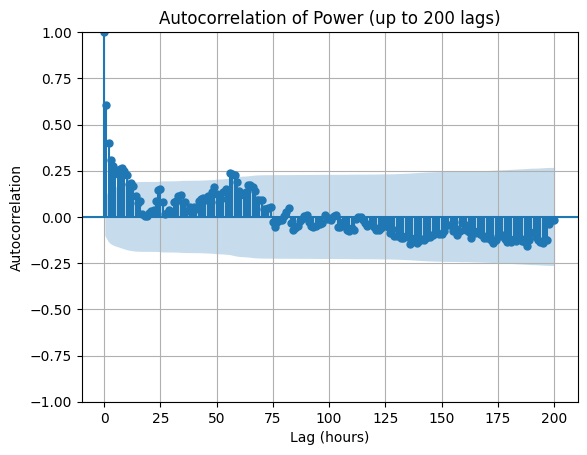

In [175]:
plt.figure(figsize=(12, 6))
plot_acf(df["power"].dropna(), lags=200)
plt.title("Autocorrelation of Power (up to 200 lags)")
plt.xlabel("Lag (hours)")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()


In [ ]:
# Create lag features
lags = [1, 2, 3, 6, 12, 24, 48, 72, 168]
for lag in lags:
    df_hourly[f"power_t-{lag}"] = df_hourly["power"].shift(lag)

# Create target variable (power 1 hour ahead)
df_hourly["power_target"] = df_hourly["power"].shift(-1)

# Drop rows with NaNs caused by shifting
df_hourly = df_hourly.dropna(subset=[f"power_t-{lag}" for lag in lags] + ["power_target"])


In [168]:
df_hourly["power_lag1"] = df_hourly["power"].shift(1)     # 1 hour before
df_hourly["power_lag2"] = df_hourly["power"].shift(2)     # 2 hours before
df_hourly["power_lag24"] = df_hourly["power"].shift(24)   # same hour yesterday


In [169]:
df_model = df_hourly.dropna(subset=["power_target", "power_lag1", "power_lag2", "power_lag24"])


In [170]:
X = df_model.drop(columns=["time", "ptime", "power", "power_target"])  # keep all predictors + lags
y = df_model["power_target"]


In [171]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False  # Important: no shuffling for time series
)


In [172]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [173]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"1-hour ahead - MSE: {mse:.2f}, R²: {r2:.2f}")

1-hour ahead - MSE: 4812861.19, R²: 0.16


Wenn wir nur die rohen Windrichtungswerte (0-360 Grad) direkt als Merkmale verwenden, würden viele Algorithmen für maschinelles Lernen 360° und 0° als weit voneinander entfernte Punkte interpretieren, obwohl sie denselben physischen Ort (Norden) repräsentieren. Dies würde das Modell verwirren, da es nicht erkennen würde, dass 350° nahe 10° auf dem Kreis liegt.
Um dieses Problem zu vermeiden und die zyklische Beziehung zu erfassen, möchte ich die Windrichtung in zwei Komponenten (Sinus und Kosinus) aufteilen, die die x- und y-Koordinaten auf dem Einheitskreis darstellen.

In [135]:
## Prepared Data
print(df_hourly.head())

   wind_speed  temperature       pressure        power  day_of_week  month  \
0   11.588646   274.931052  102829.531942  7507.229167          0.0   12.0   
1   11.976036   271.585685  103019.157560  8522.229885          1.0    1.0   
2    7.583021   269.449376  103671.525472  5151.031250          2.0    1.0   
3    8.612425   270.506826  103472.493581  5588.365591          3.0    1.0   
4   13.691578   272.621980  102751.132216  8727.739583          4.0    1.0   

   hour  week_of_year  wind_direction_sin  wind_direction_cos  
0  21.0             1           -0.995340            0.096423  
1  21.0             1           -0.725745            0.687964  
2  21.0             1           -0.824107            0.566434  
3  20.0             1           -0.920612            0.390478  
4  21.0             1           -0.970079            0.242790  


In [136]:
# See total number of NaNs in each column
print(df_hourly.isna().sum())

wind_speed            3
temperature           3
pressure              3
power                 3
day_of_week           3
month                 3
hour                  3
week_of_year          3
wind_direction_sin    3
wind_direction_cos    3
dtype: int64


In [137]:
# Remove any rows that contain NaN values
df_hourly = df_hourly.dropna()


In [138]:
df_hourly["power_lag1"] = df_hourly["power"].shift(1)
df_hourly["power_target"] = df_hourly["power"].shift(-1)
df_hourly["power_lag2"] = df_hourly["power"].shift(2)
df_hourly["power_lag24"] = df_hourly["power"].shift(24)  # Same hour yesterday

df_hourly = df_hourly.dropna(subset=["power_lag1", "power_target"])


In [139]:
df_hourly.head(5)

,wind_speed,temperature,pressure,power,day_of_week,month,hour,week_of_year,wind_direction_sin,wind_direction_cos,power_lag1,power_target,power_lag2,power_lag24
1,11.976036,271.585685,103019.157560,8522.229885,1.0,1.0,21.0,1,-0.725745,0.687964,7507.229167,5151.031250,NaN,NaN
2,7.583021,269.449376,103671.525472,5151.031250,2.0,1.0,21.0,1,-0.824107,0.566434,8522.229885,5588.365591,7507.229167,NaN
3,8.612425,270.506826,103472.493581,5588.365591,3.0,1.0,20.0,1,-0.920612,0.390478,5151.031250,8727.739583,8522.229885,NaN
4,13.691578,272.621980,102751.132216,8727.739583,4.0,1.0,21.0,1,-0.970079,0.242790,5588.365591,5752.979167,5151.031250,NaN
5,9.242556,274.037431,102987.641778,5752.979167,5.0,1.0,21.0,1,-0.847631,0.530587,8727.739583,5316.145833,5588.365591,NaN


In [140]:
X = df_hourly.drop(columns=["power", "power_target"])  # keep power_lag1
y = df_hourly["power_target"]


In [141]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False  # Important: no shuffling for time series
)


In [142]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [143]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"1-hour ahead - MSE: {mse:.2f}, R²: {r2:.2f}")

1-hour ahead - MSE: 4527682.87, R²: 0.22


In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Generate Synthetic Hourly Data (30 days = 720 hours)
np.random.seed(42)
hours = pd.date_range(start="2023-01-01", periods=720, freq="h")
df = pd.DataFrame({
    "time": hours,
    "wind_speed": np.abs(np.random.normal(10, 3, size=720)),
    "temperature": np.random.normal(280, 5, size=720),
    "pressure": np.random.normal(101500, 300, size=720),
})

# 2. Simulate 'power' output (non-linear function of wind_speed + noise)
df["power"] = 300 * (df["wind_speed"] ** 2) + np.random.normal(0, 1000, size=720)

# 3. Add Time Features
df["hour"] = df["time"].dt.hour
df["day_of_week"] = df["time"].dt.dayofweek
df["month"] = df["time"].dt.month

# 4. Add Lag Features (t-1, t-24, t-168)
df["power_t-1"] = df["power"].shift(1)
df["power_t-24"] = df["power"].shift(24)
df["power_t-168"] = df["power"].shift(168)

# 5. Create Target: 1-hour ahead power
df["power_target"] = df["power"].shift(-1)

# 6. Drop rows with NaNs from shifting
df = df.dropna()

# 7. Define Features & Target
features = ["wind_speed", "temperature", "pressure", "hour", "day_of_week", "month",
            "power_t-1", "power_t-24", "power_t-168"]
X = df[features]
y = df["power_target"]

# 8. Train/Test Split (last 20% as test)
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# 9. Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 10. Predict and Evaluate
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"1-Hour Ahead Forecast:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


1-Hour Ahead Forecast:
Mean Squared Error: 388141448.38
R² Score: -0.05


Epoch 1/100


/tmp/ipykernel_5799/3414266280.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_index = pd.date_range(start="2023-01-01", periods=hours, freq="H")
/home/mamunds/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1313 - val_loss: 0.0209
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0191 - val_loss: 0.0225
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0195 - val_loss: 0.0210
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0190 - val_loss: 0.0210
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0192 - val_loss: 0.0222
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0195 - val_loss: 0.0225
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0193 - val_loss: 0.0213
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0194 - val_loss: 0.0212
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0185 - val_loss: 0.0211
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0189 - val_loss: 0.0234
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0191 - val_loss: 0.0211
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step

📊 LSTM 1-Hour Ahead For

/tmp/ipykernel_5799/3414266280.py:110: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from current font.
  plt.tight_layout()
/home/mamunds/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


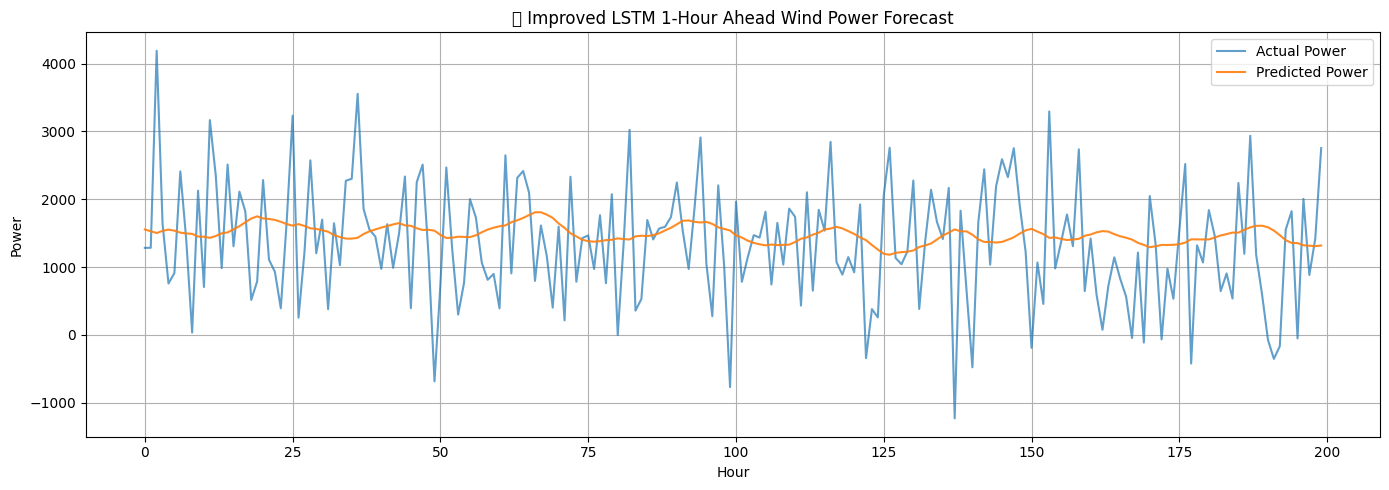

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 1. Generate Demo Dataset
np.random.seed(42)
hours = 2000
time_index = pd.date_range(start="2023-01-01", periods=hours, freq="H")

data = pd.DataFrame(index=time_index)
data["wind_speed"] = np.random.normal(10, 3, size=hours) + np.sin(np.linspace(0, 20, hours))
data["temperature"] = 15 + 10 * np.sin(np.linspace(0, 4 * np.pi, hours)) + np.random.normal(0, 2, hours)
data["pressure"] = 1013 + 5 * np.cos(np.linspace(0, 3 * np.pi, hours)) + np.random.normal(0, 1, hours)

# Create target: wind power (some nonlinear relation)
data["power"] = (
    300 * data["wind_speed"] +
    2 * data["temperature"] -
    1.5 * data["pressure"] +
    np.random.normal(0, 50, hours)
)

# Add time features (optional but helpful)
data["hour"] = data.index.hour
data["day_of_week"] = data.index.dayofweek
data["month"] = data.index.month
data["wind_direction"] = np.random.uniform(0, 360, size=hours)
data["wind_direction_sin"] = np.sin(np.deg2rad(data["wind_direction"]))
data["wind_direction_cos"] = np.cos(np.deg2rad(data["wind_direction"]))

# Drop the raw wind direction
data.drop("wind_direction", axis=1, inplace=True)

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# 2. Create sequences
def create_sequences(data, time_steps=72):  # longer history
    X, y = [], []
    for i in range(len(data) - time_steps - 1):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps][data_columns.index("power")])
    return np.array(X), np.array(y)

data_columns = data.columns.tolist()
TIME_STEPS = 72  # longer context

X, y = create_sequences(scaled_data, TIME_STEPS)

# 3. Train-test split
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# 4. Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(TIME_STEPS, X.shape[2])))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 5. Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# 6. Predict
y_pred = model.predict(X_test)

# 7. Inverse scaling for the target
power_min = scaler.data_min_[data_columns.index("power")]
power_max = scaler.data_max_[data_columns.index("power")]

y_test_inv = y_test * (power_max - power_min) + power_min
y_pred_inv = y_pred.flatten() * (power_max - power_min) + power_min

# 8. Evaluation
mse = mean_squared_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"\n📊 LSTM 1-Hour Ahead Forecast Results:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# 9. Plot results
plt.figure(figsize=(14, 5))
plt.plot(y_test_inv[:200], label="Actual Power", alpha=0.7)
plt.plot(y_pred_inv[:200], label="Predicted Power", alpha=0.9)
plt.title("🔮 Improved LSTM 1-Hour Ahead Wind Power Forecast")
plt.xlabel("Hour")
plt.ylabel("Power")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
